# Entrenamiento y validacion de modelos

En esta seccion se realiza el entrenamiento y validacion de los siguientes modelos:

- Arbol de decision.
- Metodo de ensamble: Random Forest.
- RNA: Sequential (Keras).
- Modelo a eleccion: SVM (Support Vector Machine).

Se realiza la validacion del modelo utilizando el conjunto de datos de validacion obtenidos en la etapa de preprocesamiento. Se muestran las siguientes metricas:

#### Accuracy 
Proporción total de predicciones correctas sobre todas las muestras.

#### Precision
Proporción de muestras predichas como positivas que realmente lo son.

#### Recall
Proporción de positivos reales que el modelo logra identificar.

#### F1-Score
Media armónica entre precisión y recall. Resume ambas métricas en un solo valor, siendo útil cuando hay clases desbalanceadas y necesitás un equilibrio entre precisión y sensibilidad.

#### Matriz de confusion
Permite identificar no solo qué tan bien predice el modelo, sino cómo se equivoca (por ejemplo, si confunde muchos positivos con negativos).

#### ROC-AUC
Área bajo la curva ROC, que representa el rendimiento del modelo para distintos umbrales de decisión.

## Arbol de decision

El arbol de decision que se entrena a continuacion es DecisionTreeClassifier, que se encuentra en la libreria de python SkLearn.
Los hiperaparametros que se eligieron para el entrenamiento de este modelo son los que se encuentran por default.

### Entrenamiento

In [1]:
import sys
import os
import pandas as pd

ROOT = os.path.abspath("..")  # subir desde data
sys.path.append(ROOT)

from backend.model.arbol.DecisionTree import DecisionTree

X_train = pd.read_csv(os.path.join(ROOT, "data/train/X_train_scaled.csv"))
y_train = pd.read_csv(os.path.join(ROOT, "data/train/y_train.csv")).values.ravel()

X_test = pd.read_csv(os.path.join(ROOT, "data/test/X_valid_scaled.csv"))
y_test = pd.read_csv(os.path.join(ROOT, "data/test/y_valid.csv")).values.ravel()

dt = DecisionTree(class_weight='balanced', name='Decision Tree Titanic')
accuracy_dt = dt.train(X_train, y_train)
print(f"Train accuracy: {accuracy_dt}")

dt.save_model(f"{ROOT}/backend/model/arbol/decision_tree_titanic.pkl")

[OK] Decision Tree Titanic entrenado.
Train accuracy: 0.9831460674157303
[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/arbol/decision_tree_titanic.pkl.


### Validacion


===== RESULTADOS =====
Accuracy: 0.7877
Precision: 0.7460
Recall: 0.6812
F1 Score: 0.7121

Reporte completo:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



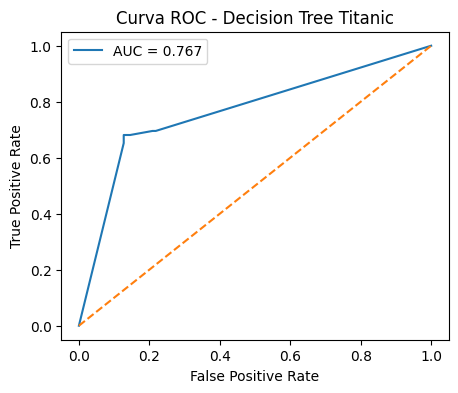

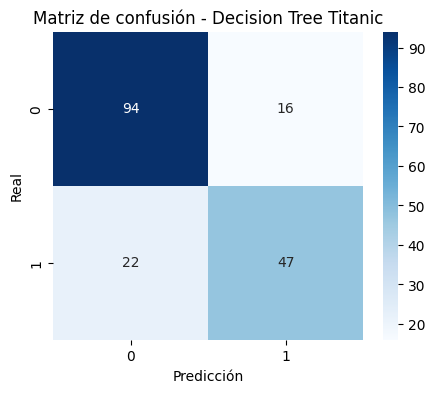

In [2]:
metricas = dt.validate(X_test, y_test)
dt.plot_roc_curve()
dt.plot_confusion_matrix()

## Random Forest

El modelo que se entrena a continuacion es Random Forest, que se encuentra en la libreria SkLearn de python. Se ajustaron los siguientes hiperparametros para obtener mejor rendimiento:
* n_estimators: numero de arboles.
* max_depth: maxima profundidad del arbol.
* min_samples_split: mínimo número de muestras necesarias para que un nodo pueda dividirse.
* min_samples_leaf: Es el número mínimo de muestras que debe tener un nodo hoja.
* class_weight: es un parámetro que permite asignar pesos diferentes a cada clase al momento de entrenar un modelo de clasificación.

### Entrenamiento

In [3]:
from backend.model.random_forest.RandomForest import RandomForest

rf = RandomForest(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    name='Random Forest Titanic'
)

accuracy_rf = rf.train(X_train, y_train)
print(f"Train accuracy: {accuracy_rf}")
rf.save_model(f"{ROOT}/backend/model/random_forest/random_forest_titanic.pkl")

[OK] Random Forest Titanic entrenado.
Train accuracy: 0.925561797752809
[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/random_forest/random_forest_titanic.pkl.


### Validacion


===== RESULTADOS =====
Accuracy: 0.8156
Precision: 0.7812
Recall: 0.7246
F1 Score: 0.7519

Reporte completo:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



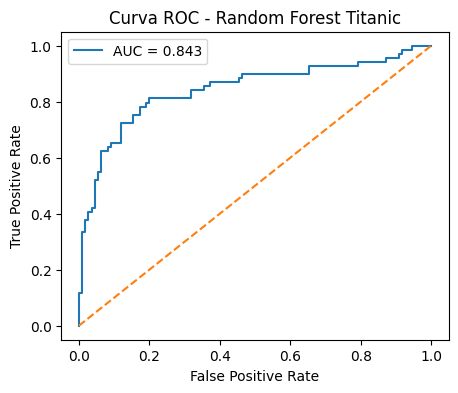

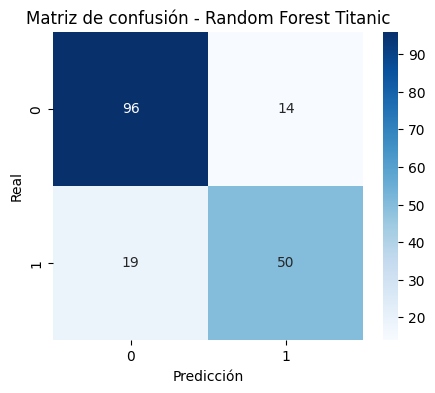

In [4]:
metricas = rf.validate(X_test, y_test)
rf.plot_roc_curve()
rf.plot_confusion_matrix()

## Red Neuronal Artificial

Para este caso, se utilizo la libreria de tensorflow para entrar una RNA. Se utiliza el modelo Sequential que esta en Keras. Se utiliza el optimizador Adam, y se cuenta con las siguientes capas:
- La primera es de 32 nodos.
- La segunda es de 16 nodos.
- La tercera es de 8 nodos.
- La ultima es de 1 nodo.

Todas las capas internas usan ReLU, una función que ayuda al modelo a aprender relaciones no lineales.
La última capa usa sigmoid, que devuelve un número entre 0 y 1 (una probabilidad).

In [5]:
from backend.model.rna.KerasModel import KerasModel
from backend.model.rna.build_rna import build_rna_model

rna = KerasModel(
    build_fn=lambda: build_rna_model(X_train.shape[1]),
    name='RNA Titanic'
)

history = rna.train(X_train, y_train, epochs=1000, batch_size=32)
rna.save_model(f"{ROOT}/backend/model/rna/rna_titanic.h5")

C:\Users\Andres\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/rna/rna_titanic.h5


### Validacion

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

===== RESULTADOS =====
Accuracy: 0.7989
Precision: 0.7895
Recall: 0.6522
F1 Score: 0.7143

Reporte completo:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



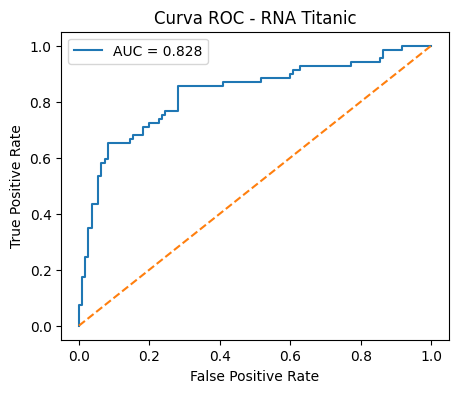

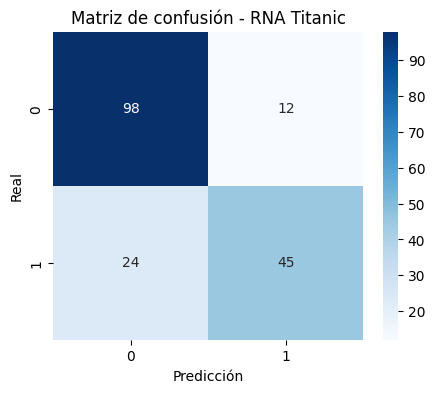

In [6]:
metricas = rna.validate(X_test, y_test)
print("\n===== RESULTADOS =====")
print(f"Accuracy: {metricas['accuracy']:.4f}")
print(f"Precision: {metricas['precision']:.4f}")
print(f"Recall: {metricas['recall']:.4f}")
print(f"F1 Score: {metricas['f1']:.4f}")
print("\nReporte completo:\n", metricas["report"])
rna.plot_roc_curve()
rna.plot_confusion_matrix()

## SVM (Support Vector Machine)

El modelo utilizado es el que se encuentra en la libreria de python SkLearn, la misma es SVC (Support Vector Classification). Se ajustaron algunos hiperparametros para obtener mejores resultados:
* class_weight: es un parámetro que permite asignar pesos diferentes a cada clase al momento de entrenar un modelo de clasificación.
* kernel: se utiliza rbf, que transforma los datos a un espacio de mayor dimensión donde es más fácil separarlos con una frontera no lineal.

### Entrenamiento

In [7]:
from backend.model.svm.SVM import SVM

svm = SVM(
    class_weight='balanced',
    kernel='rbf',
    name='SVM Titanic'
)

accuracy_svm = svm.train(X_train, y_train)
print(f"Train accuracy: {accuracy_svm}")
svm.save_model(f"{ROOT}/backend/model/svm/svm_titanic.pkl")

[OK] SVM Titanic entrenado.
Train accuracy: 0.8328651685393258


### Validacion


===== RESULTADOS =====
Accuracy: 0.8156
Precision: 0.7647
Recall: 0.7536
F1 Score: 0.7591

Reporte completo:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



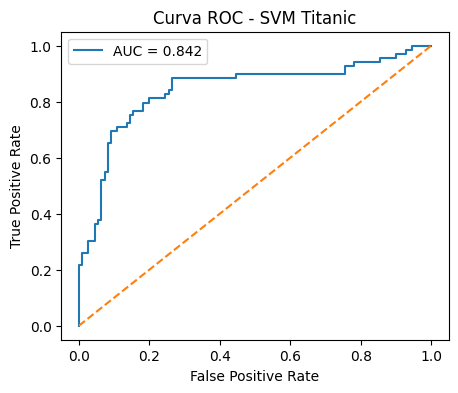

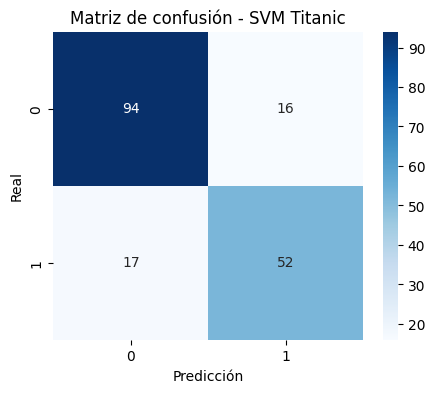

In [8]:
metricas = svm.validate(X_test, y_test)
svm.plot_roc_curve()
svm.plot_confusion_matrix()